# Assignment 1
## We have simulate data 10 points on each side of hyper plane x+y+z=1 in R^3 then use that data and do logistic regression, that will give us another hyper L(x,y,z)

## Plot all the 20 points x+y+z=1 and L(x,y,z)

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
#genetating random numbers

x=100*np.random.normal(0, 1, 100)
y=100*np.random.normal(0, 1, 100)
z=100*np.random.normal(0, 1, 100)


a=[]
# making empty list for taking Points such that x+y+z-1>0
b=[]
# making empty list for taking Points such that x+y+z-1<=0

for i in range(0,100):
    if x[i]+y[i]+z[i]-1>0 and len(a)<=10:
        a.append((x[i],y[i],z[i],1))
    if x[i]+y[i]+z[i]-1<0 and len(b)<=10:
        b.append((x[i],y[i],z[i],0))
        
#convirtion into pandas data frame        
data1=pd.DataFrame(a)
data2=pd.DataFrame(b)
        
d=a+b
# Making the two sets with labels into one set 
data=pd.DataFrame(d)

X1= data.loc[:, 0:2]

# This is columns except the last column where last column is the labels
Y1=data.loc[:,3]
# This is the last column


In [2]:
#adding bias =1 as a new veriable
C=np.ones(shape=(22))
#X=pd.DataFrame(C.T,X1)
X1["BIAS"]=C
X1

,0,1,2,BIAS
0,143.133945,-10.806993,152.406123,1.0
1,-11.747184,-101.636786,115.187628,1.0
2,18.173613,77.868643,-90.552506,1.0
3,77.790362,89.440707,88.394148,1.0
4,142.579140,11.276541,25.159464,1.0
5,45.405869,71.060656,-51.343728,1.0
6,56.225262,104.076643,-34.543600,1.0
7,69.304639,268.706065,-37.033596,1.0
8,81.182661,115.835554,40.426008,1.0
9,179.501269,-36.927464,-105.836063,1.0


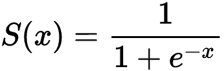

In [3]:
#sigmoied function
def sigmoied(z):
    f=1/(1+np.exp(-z))
    return f

## Cost function

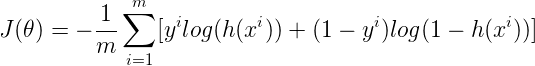
## OR
$J(\Theta )=-\left (\frac{1}{m}  \right )\left ( Y^T\cdot \log(\text{sigmoied}\left (\Theta \cdot X  \right ))+ (1-Y)^T\cdot \log(\text{sigmoied}\left (1-\Theta \cdot X  \right )) \right )$
## Gradient is
$\text{GRADIENT}=\left ( \frac{1}{m} \right )\left (\left (\text{sigmoied}\left (\Theta \cdot X  \right )-Y  \right ) \bullet X  \right )$

In [4]:
#cost function
def cost(X,Y):
    m=np.shape(X1)[0]
    A=(-1/m)*(np.dot(Y.T,np.log(sigmoied(X)))+np.dot((1-Y.T),np.log(sigmoied(1-X))))
    return A


#gradient function
def gradient(X,Y,theta):
    m=np.shape(X)[0]
    x_theta=np.dot(X,theta)
    A=np.dot((sigmoied(x_theta)-Y)/m,X)
    return A

In [5]:
def logistic_reg(X,Y,learning_rate,no_iter):
    #X[bias]=np.ones(shape=(22,1))
    n=np.shape(X)[1]
    #NUMBER OF VARIABLS INCLUDING BIAS
    m=np.shape(X)[0]
    #NUMBER OF POINTS
    theta=np.random.normal(0, 1,n )
    e=[]
    f=[]
    
    for i in range(no_iter):
        
        x_theta=np.dot(X,theta) 
        J=cost(x_theta,Y)
        e.append(J)
        f.append(i)
        #for debugging loss for each step
        
        GRADIENT=np.dot((sigmoied(x_theta)-Y)/m,X)
        # Gradient funtion
        
        theta=theta-learning_rate*GRADIENT
        #gR
    
    return theta,e,f

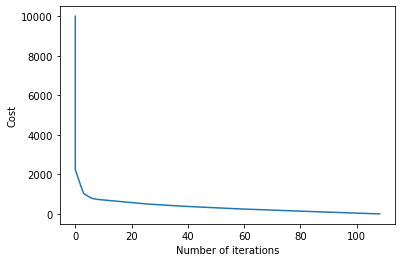

In [6]:
theta,cost,steps= logistic_reg(X1,Y1,0.00005,10000)

plt.plot(cost, steps)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

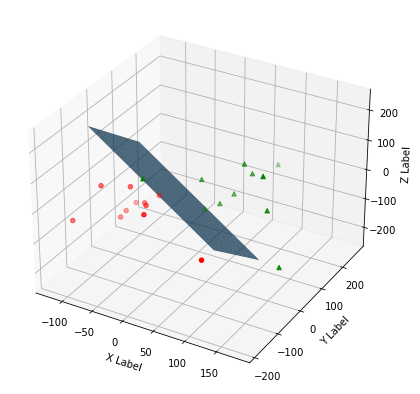

In [7]:
fig = plt.figure(figsize =(7,7))
ax = plt.axes(projection='3d')


zdata = data1.loc[:, 2]
xdata = data1.loc[:, 0]
ydata = data1.loc[:, 1]
ax.scatter(xdata, ydata, zdata, c='g', marker='^')
#points such that x+y+z-1>0 marked as green with symbol "^"


zdata1 = data2.loc[:, 2]
xdata1 = data2.loc[:, 0]
ydata1 = data2.loc[:, 1]
ax.scatter(xdata1, ydata1, zdata1, c='r', marker='o')
#points such that x+y+z-1<0 marked as red with symbol "o"


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#axis labels

x = np.linspace(-100,100,100)
y = np.linspace(-100,100,100)
X,Y = np.meshgrid(x,y)
Z=-(theta[0]*X + theta[1]*Y + theta[3])/theta[2]
z1=-(X+Y-1)
surf = ax.plot_surface(X, Y, Z)
# addation of the plane on the same plot


plt.show()